# **SISTEM REKOMENDASI ARTIKEL ILMIAH**

Project ini dibuat untuk memberikan kemudahan dalam menentukan artikel ilmiah yang akan dibaca lebih lanjut.

**Langkah 1: Memuat Dataset**

Kita akan mengunduh dan memuat data dari GitHub. Kita akan membaca file CSV menggunakan pandas dan memeriksa struktur datanya.

In [9]:
import pandas as pd

# URL file CSV di GitHub (ganti dengan URL file Anda)
url = "https://raw.githubusercontent.com/hollandakusuma/recommendationSystemIoT/refs/heads/main/Artikel%20IoT.xlsx"

# Membaca data CSV
data = pd.read_excel(url)

# Menampilkan data 5 baris pertama
print(data.head())

   Cites         Authors                                              Title  \
0   1200      L. Chettri  A Comprehensive Survey on Internet of Things (...   
1    883     K. Shafique  Internet of things (IoT) for next-generation s...   
2    766  M.A. Al-Garadi  A Survey of Machine and Deep Learning Methods ...   
3    630        G. Aceto  Industry 4.0 and Health: Internet of Things, B...   
4    590      Y.A. Qadri  The Future of Healthcare Internet of Things: A...   

   Year                                         Source  Publisher  \
0  2020                IEEE Internet of Things Journal        NaN   
1  2020                                    IEEE Access        NaN   
2  2020      IEEE Communications Surveys and Tutorials        NaN   
3  2020  Journal of Industrial Information Integration        NaN   
4  2020      IEEE Communications Surveys and Tutorials        NaN   

                                          ArticleURL  \
0  https://www.scopus.com/inward/record.uri?partn...  

# **DATA UNDERSTANDING**
**Langkah 2: Eksplorasi Data**

Setelah berhasil memuat file, lakukan langkah eksplorasi awal yang sama seperti pada data CSV:


1.   Tampilkan kolom yang tersedia.
2.   Identifikasi kolom yang relevan untuk analisis.

In [10]:
# 1. Menampilkan informasi dataset
print("INFORMASI DATASET:")
print(data.info())

# 2. Cek nilai kosong
print("\nCEK NILAI KOSONG:")
print(data.isnull().sum())

# Menampilkan kolom yang tersedia
print("\nKOLOM DATA YANG TERSEDIA:")
print(data.columns)

# 3. Deskripsi Statistik
print("\nDeskripsi Statistik Kolom Numerik:")
print(data.describe())

# 4. Distribusi Data Unik
print("\nDistribusi Data Unik di Kolom 'Source':")
print(data['Source'].value_counts())

INFORMASI DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Cites           1000 non-null   int64         
 1   Authors         1000 non-null   object        
 2   Title           1000 non-null   object        
 3   Year            1000 non-null   int64         
 4   Source          1000 non-null   object        
 5   Publisher       0 non-null      float64       
 6   ArticleURL      1000 non-null   object        
 7   CitesURL        1000 non-null   object        
 8   GSRank          1000 non-null   int64         
 9   QueryDate       1000 non-null   datetime64[ns]
 10  Type            1000 non-null   object        
 11  DOI             994 non-null    object        
 12  ISSN            966 non-null    object        
 13  CitationURL     1000 non-null   object        
 14  Volume          955 non-null    float6

#**Univariate Exploratory Data Analysis (EDA)**
**2. Distribusi dan Frekuensi Data**

*    **Distribusi Jumlah Sitasi**: Memahami artikel mana yang paling banyak dikutip.
*    **Frekuensi Tipe Artikel (Type)**: Mengetahui sebaran jenis artikel.
*    **Frekuensi Source** : Mengetahui sebaran tempat Artikel Ilmiah dipublikasikan
*    **Penulis dengan artikel terbanyak**: Mengidentifikasi penulis yang memiliki artikel terbanyak dalam dataset.

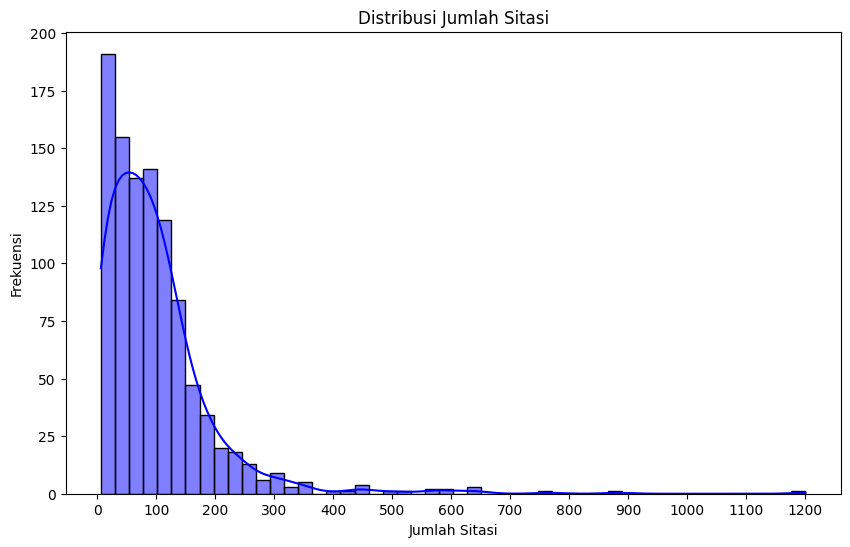

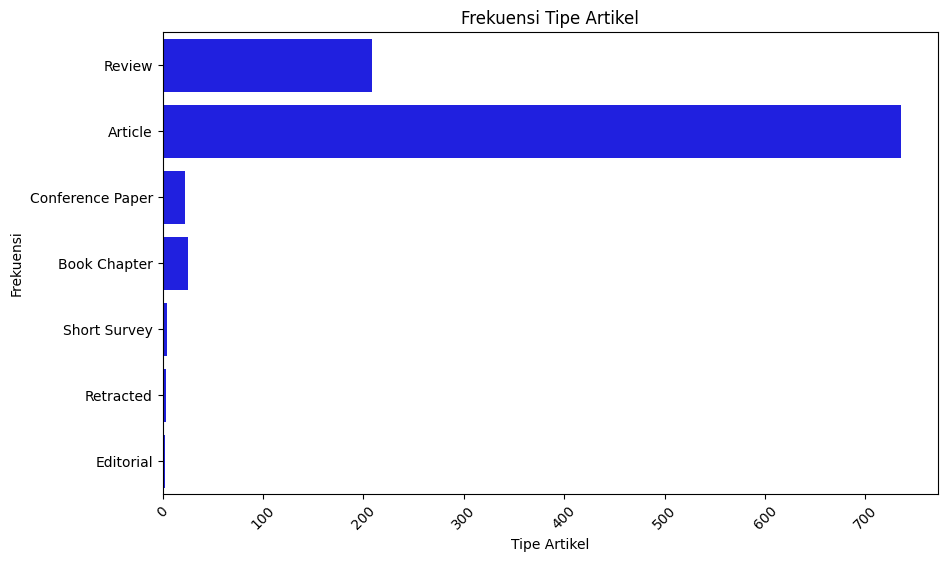

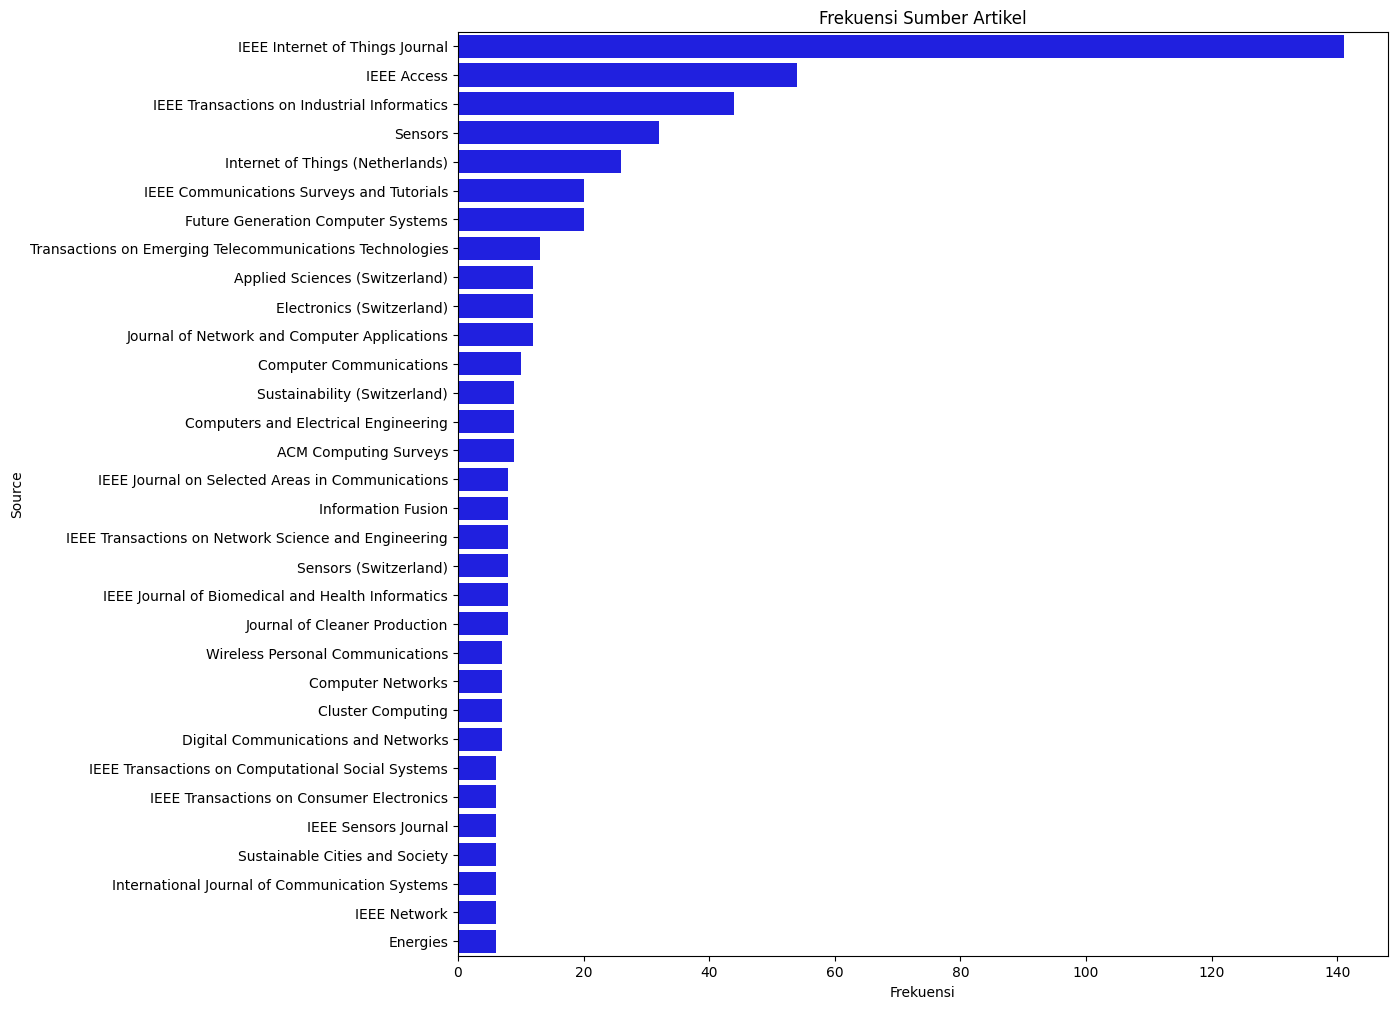

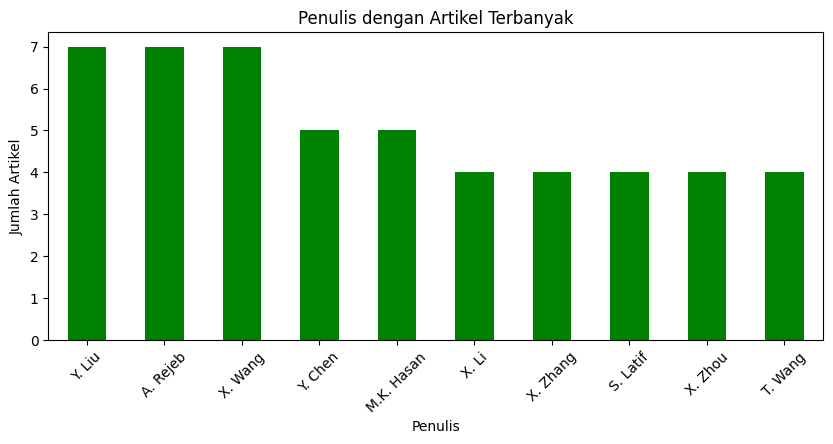

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribusi Jumlah Sitasi
plt.figure(figsize=(10, 6))
sns.histplot(data['Cites'], kde=True, bins=50, color='blue')
plt.title('Distribusi Jumlah Sitasi')
plt.xlabel('Jumlah Sitasi')
plt.ylabel('Frekuensi')

# Menambahkan Xticks dengan interval tertentu, misalnya setiap 100 sitasi
plt.xticks(ticks=range(0, int(data['Cites'].max())+100, 100))
plt.show()

# 2. Frekuensi Tipe Artikel
plt.figure(figsize=(10, 6))
sns.countplot(data['Type'], color='blue')
plt.title('Frekuensi Tipe Artikel')
plt.xlabel('Tipe Artikel')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

# 3. Frekuensi Sumber Artikel
source_counts = data['Source'].value_counts()
source_counts_filtered = source_counts[source_counts > 5]

plt.figure(figsize=(12, 12))
sns.countplot(y=data['Source'], color='blue', order=source_counts_filtered.index)
plt.title('Frekuensi Sumber Artikel')
plt.xlabel('Frekuensi')
plt.ylabel('Source')
plt.show()

# 4. Penulis dengan Artikel Terbanyak
# Menghitung jumlah artikel per penulis
authors_count = data['Authors'].value_counts().head(10)  # 10 penulis terbanyak
plt.figure(figsize=(10, 4))
authors_count.plot(kind='bar', color='green')
plt.title('Penulis dengan Artikel Terbanyak')
plt.xlabel('Penulis')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.show()


#**DATA PREPARATION**
**1. Penghapusan Kolom Tidak Relevan**

Pada dataset asli, terdapat beberapa kolom yang kosong atau tidak relevan dengan tujuan proyek. Kolom-kolom ini dihapus untuk mengurangi kompleksitas data dan meningkatkan efisiensi pemrosesan. Berikut adalah kolom yang dihapus:

- Publisher: Kolom ini sepenuhnya kosong dan tidak mengandung informasi yang berguna untuk analisis atau rekomendasi artikel.

- ECC: Kolom ini berisi informasi yang tidak relevan dengan pengembangan sistem rekomendasi, karena tidak mempengaruhi kesamaan artikel.

- Abstract: Tidak memiliki data yang terisi, dan meskipun dapat menjadi sumber informasi penting dalam beberapa model, kolom ini tidak digunakan dalam model rekomendasi yang dirancang.

- FullTextURL: Kolom ini tidak memberikan kontribusi langsung terhadap pengolahan data untuk fitur rekomendasi.

- RelatedURL: Kolom ini juga kosong dan tidak relevan dengan fitur atau tujuan sistem rekomendasi.
Volume, Issue, StartPage, dan EndPage: Kolom-kolom ini berisi detail teknis tentang publikasi yang tidak memiliki kontribusi langsung terhadap penentuan relevansi artikel dalam konteks sistem rekomendasi.

- CitesPerYear: Meskipun berguna dalam konteks analisis sitasi, kolom ini tidak digunakan dalam model rekomendasi yang lebih berfokus pada jumlah sitasi total (Cites).

- GSRank, QueryDate, CitesURL, ISSN, CitationURL, dan Age: Kolom-kolom ini juga tidak memberikan informasi yang relevan atau langsung mempengaruhi hasil rekomendasi yang berbasis pada judul artikel dan jumlah sitasi.

In [12]:
# Hapus kolom yang kosong atau tidak relevan
columns_to_drop = ['Publisher', 'ECC','Abstract', 'FullTextURL', 'RelatedURL',
                   'Volume', 'Issue', 'StartPage', 'EndPage',
                   'GSRank','QueryDate','CitesURL','ISSN','CitationURL','Age']

# Buang kolom dari dataset
data_cleaned = data.drop(columns=columns_to_drop)

# Tampilkan informasi dataset setelah pembersihan
print(data_cleaned.info())

# Tampilkan data beberapa baris pertama
print(data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cites           1000 non-null   int64  
 1   Authors         1000 non-null   object 
 2   Title           1000 non-null   object 
 3   Year            1000 non-null   int64  
 4   Source          1000 non-null   object 
 5   ArticleURL      1000 non-null   object 
 6   Type            1000 non-null   object 
 7   DOI             994 non-null    object 
 8   CitesPerYear    1000 non-null   float64
 9   CitesPerAuthor  1000 non-null   int64  
 10  AuthorCount     1000 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB
None
   Cites         Authors                                              Title  \
0   1200      L. Chettri  A Comprehensive Survey on Internet of Things (...   
1    883     K. Shafique  Internet of things (IoT) for next-generation s...   
2   


2. Preprocessing Teks

Untuk kolom Title, dilakukan preprocessing teks agar siap untuk analisis rekomendasi artikel. Tahapan preprocessing meliputi:

-    Lowercasing: Semua kata diubah menjadi huruf kecil untuk menyamakan format.
-    Punctuation Removal: Tanda baca seperti titik, koma, atau tanda kurung dihapus.
-    Stopword Removal: Kata-kata umum seperti "the", "and", "of" dihapus untuk meningkatkan relevansi analisis.

Proses ini memastikan bahwa teks lebih bersih dan representatif untuk analisis.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
from nltk.corpus import stopwords

# Mengunduh stopwords dari NLTK
import nltk
nltk.download('stopwords')

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    text = ''.join([char for char in text if char not in string.punctuation])  # Menghapus tanda baca
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Menghapus stopwords
    return text

# Terapkan pembersihan teks pada kolom 'Title'
data_cleaned['Title_cleaned'] = data_cleaned['Title'].apply(clean_text)

# Menampilkan beberapa judul setelah pembersihan
print(data_cleaned[['Title', 'Title_cleaned']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               Title  \
0  A Comprehensive Survey on Internet of Things (...   
1  Internet of things (IoT) for next-generation s...   
2  A Survey of Machine and Deep Learning Methods ...   
3  Industry 4.0 and Health: Internet of Things, B...   
4  The Future of Healthcare Internet of Things: A...   

                                       Title_cleaned  
0  comprehensive survey internet things iot towar...  
1  internet things iot nextgeneration smart syste...  
2  survey machine deep learning methods internet ...  
3  industry 40 health internet things big data cl...  
4  future healthcare internet things survey emerg...  


3. Representasi Teks Menggunakan Ekstrasi Fitur

Menggunakan TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengonversi teks judul artikel menjadi vektor numerik yang dapat diproses oleh algoritma.

In [14]:
# Menggunakan TF-IDF Vectorizer untuk mengonversi teks menjadi representasi numerik
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data_cleaned['Title_cleaned'])

# Menampilkan dimensi matriks TF-IDF
print(f'TF-IDF Matrix Shape: {tfidf_matrix.shape}')


TF-IDF Matrix Shape: (1000, 1717)


# **MODEL DEVELOPMENT : CONTENT BASED FILTERING**


1. Menghitung Kemiripan Antar Artikel

Menggunakan Cosine Similarity untuk menghitung kemiripan antara artikel yang diminta dengan artikel lainnya berdasarkan vektor TF-IDF mereka.

In [15]:
# Menghitung kemiripan antar artikel menggunakan Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Menampilkan matriks kemiripan untuk artikel pertama
print(cosine_sim[0])


[1.         0.15118979 0.22831369 0.01574922 0.13914627 0.18842416
 0.12378183 0.10887933 0.02197799 0.15941962 0.02074513 0.01807203
 0.01466832 0.20822822 0.01716853 0.14944392 0.12569858 0.24781036
 0.01629907 0.01303168 0.10034681 0.         0.01583038 0.38258942
 0.10423    0.01326505 0.10475868 0.22244709 0.01781348 0.01718202
 0.02159097 0.01646718 0.01827125 0.01747922 0.21651558 0.01739643
 0.01703326 0.01808815 0.01654619 0.33668897 0.13213188 0.02447343
 0.01217728 0.01438316 0.         0.01797037 0.02083511 0.01724306
 0.01614525 0.01720352 0.02153491 0.47129529 0.02073266 0.12805885
 0.02403699 0.18509592 0.00958978 0.01514589 0.01651717 0.12629898
 0.         0.01503373 0.08243819 0.01389865 0.01383174 0.
 0.01958193 0.08731331 0.02012116 0.08738246 0.01772832 0.01813181
 0.01458091 0.10329304 0.01366397 0.17530323 0.01559639 0.02008997
 0.24219172 0.01458758 0.01121308 0.15396087 0.12105018 0.01537721
 0.01602481 0.10227207 0.         0.02640848 0.22416412 0.09948904
 0.

2. Merekomendasikan Artikel

Menyaring 10 artikel paling relevan yang memiliki kemiripan tinggi dengan artikel yang diminta, serta mempertimbangkan jumlah sitasi.

Langkah-langkah:

1.    Mengambil Input Keyword dari Pengguna: Menggunakan input keyword untuk mencari artikel yang relevan berdasarkan judul.
2.    Mencocokkan Keyword dengan Artikel: Memfilter artikel yang mengandung kata kunci dari input pengguna.
3.    Menghitung Kemiripan dengan Cosine Similarity: Menggunakan cosine similarity berdasarkan judul artikel yang mengandung keyword.
4.    Menyajikan Hasil dalam Bentuk Tabel: Menampilkan hasil rekomendasi dalam bentuk tabel yang berisi Artikel ID, Title, Cites, Type, dan DOI.

In [16]:
import pandas as pd
from google.colab import data_table
from IPython.display import display

def recommend_articles_by_keyword(keyword, top_n=10):
    # Menyaring artikel yang mengandung keyword pada judul
    filtered_data = data_cleaned[data_cleaned['Title'].str.contains(keyword, case=False, na=False)]

    if filtered_data.empty:
        return "Tidak ada artikel yang mengandung kata kunci tersebut."

    # Preprocessing dan TF-IDF Vectorization pada filtered data
    tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_data['Title_cleaned'])

    # Menghitung cosine similarity antar artikel
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Menghitung bobot berdasarkan jumlah sitasi
    cites_weight = filtered_data['Cites'] / filtered_data['Cites'].max()
    weighted_cosine_sim = cosine_sim * cites_weight.values.reshape(-1, 1)

    # Menyaring artikel paling relevan berdasarkan cosine similarity
    sim_scores = list(enumerate(weighted_cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Menghindari artikel yang sama dengan input

    # Menyusun daftar rekomendasi
    recommended_idx = [i[0] for i in sim_scores]
    recommended_articles_content = filtered_data.iloc[recommended_idx][['Authors','Title', 'Cites', 'Type', 'DOI']]

    # Menambahkan Artikel ID (indeks artikel)
    recommended_articles_content['Artikel ID'] = recommended_articles_content.index
    recommended_articles_content = recommended_articles_content[['Artikel ID', 'Authors','Title', 'Cites', 'Type', 'DOI']]

    return recommended_articles_content

# Fungsi untuk menampilkan hasil dalam bentuk tabel interaktif
def display_recommended_articles_table(keyword, top_n=10):
    # Mendapatkan rekomendasi artikel berdasarkan keyword
    recommended_articles_content = recommend_articles_by_keyword(keyword, top_n)

    if isinstance(recommended_articles_content, str):
        # Jika tidak ada artikel yang ditemukan, print pesan
        print(recommended_articles_content)
    else:
        # Menampilkan rekomendasi dalam format tabel interaktif menggunakan data_table
        display(data_table.DataTable(recommended_articles_content))  # Menggunakan display untuk menampilkan tabel interaktif

# Menerima input keyword dari pengguna
user_keyword = input("Masukkan keyword untuk mencari artikel: ")
recommended_articles_content = recommend_articles_by_keyword(user_keyword, top_n=10)
display_recommended_articles_table(user_keyword, top_n=10)


Masukkan keyword untuk mencari artikel: health


,Artikel ID,Authors,Title,Cites,Type,DOI
432,432,A. Kishor,Artificial Intelligence and Internet of Things...,121,Article,10.1007/s11277-021-08708-5
806,806,V. Puri,Artificial intelligence-powered decentralized ...,43,Conference Paper,10.1002/ett.4245
694,694,M. Osama,Internet of Medical Things and Healthcare 4.0:...,45,Review,10.3390/s23177435
743,743,N. Savanović,Intrusion Detection in Healthcare 4.0 Internet...,36,Article,10.3390/su151612563
681,681,A.A. Khan,Data Security in Healthcare Industrial Interne...,49,Article,10.1109/JSEN.2023.3273851
873,873,J.K. Samriya,Adversarial ML-Based Secured Cloud Architectur...,12,Article,10.1109/TCE.2023.3341696
338,338,B.D. Deebak,Smart Mutual Authentication Protocol for Cloud...,95,Article,10.1109/JSAC.2020.3020599
525,525,L.K. Ramasamy,Secure Smart Wearable Computing through Artifi...,67,Article,10.3390/s22031076
508,508,J. Shahid,Data Protection and Privacy of the Internet of...,70,Review,10.3390/app12041927
528,528,J. Zhang,An Efficient Blockchain-Based Hierarchical Dat...,66,Article,10.1109/TII.2022.3145851


3. Matriks Evaluasi **Precision at K (P@K)**

Precision mengukur sejauh mana artikel yang direkomendasikan relevan dengan preferensi pengguna. Precision@K mengukur jumlah artikel relevan dalam K rekomendasi teratas. Dalam konteks ini, kita bisa menganggap artikel yang memiliki sitasi tinggi sebagai relevan.

Rumusnya:
$${P@K} = \frac{A​}{K}
$$

Di mana:
-   $A$ adalah Jumlah artikel relevan dalam K rekomendasi.
- $K$ adalah Jumlah rekomendasi.



In [17]:
# Evaluasi Precision@K dan Recall@K
def evaluate_recommendations(recommended_articles, relevant_articles, k=10):
    """
    recommended_articles: DataFrame hasil rekomendasi
    relevant_articles: DataFrame yang berisi artikel relevan yang sesungguhnya
    k: jumlah rekomendasi teratas yang akan dievaluasi
    """

    # Ambil K artikel teratas
    top_k_recommendations = recommended_articles.head(k)

    # Ambil artikel relevan yang ada dalam daftar artikel yang relevan
    relevant_articles_set = set(relevant_articles['Title'])

    # Hitung Precision@K
    relevant_in_top_k = top_k_recommendations[top_k_recommendations['Title'].isin(relevant_articles_set)]
    precision_at_k = len(relevant_in_top_k) / k


    return precision_at_k

# Contoh Penggunaan:
# Misalkan 'relevant_articles' adalah daftar artikel yang relevan berdasarkan sitasi
relevant_articles = data_cleaned[data_cleaned['Cites'] > 10]  # Artikel dengan sitasi > 10 dianggap relevan

# Melakukan evaluasi untuk artikel yang direkomendasikan
precision_at_k= evaluate_recommendations(recommended_articles_content, relevant_articles, k=10)

# Menampilkan hasil evaluasi
print(f"Precision@10: {precision_at_k:.4f}")


Precision@10: 1.0000
